In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image

In [3]:
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
transforms= transforms.Compose([
                transforms.Resize((32, 32)),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
                ])

In [6]:
def load_assign_rand_labels(training_size, testing_size):
    trainset = datasets.MNIST('data', train = True, download = False, 
                transform = transforms)
    # Assign random labels to the images
    trainset.targets = torch.tensor(np.random.randint(0, 10, (len(trainset)),))
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=training_size, shuffle=True)

    testset = datasets.MNIST('data', train = False, 
                transform = transforms)
    test_loader = torch.utils.data.DataLoader(testset ,batch_size = testing_size, shuffle=True)

    return (train_loader, test_loader)

In [7]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.c1 = nn.Conv2d(1, 5, 5)
        self.c2 = nn.Conv2d(5, 16, 5)
        self.l1 = nn.Linear(16 * 5 * 5, 100)
        self.l2 = nn.Linear(100, 84)
        self.l3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.relu(self.c1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.c2(x))
        x = F.max_pool2d(x, 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))

        x = self.l3(x)
        return x

In [8]:
training_size = 100
testing_size = 100
train_loader, test_loader = load_assign_rand_labels(training_size, testing_size)

In [9]:
def train_func(model, optimizer, train_data):
    model.train()
    correct = 0
    train_loss = 0
    counter = 0

    for batch_idx, (data, target) in enumerate(train_data):
        counter += 1
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.data

        pred = np.argmax(output.data, axis=1)
        correct += np.equal(pred, target.data).sum()
    
    train_loss = (train_loss * 100) / len(train_data.dataset)
    accuracy = 100.0 * correct / len(train_data.dataset)
    return train_loss, accuracy

In [10]:
def test_func(model, epoch, test_data):
    model.eval()
    test_loss = 0
    correct = 0

    for data, target in test_data:
        data, target = Variable(data), Variable(target)
        
        output = model(data)
        loss = loss_fn(output, target)
        test_loss += loss.data

        pred = np.argmax(output.data, axis = 1)
        correct = correct + np.equal(pred, target.data).sum()

    test_loss = (test_loss * 100) / len(test_loader.dataset)
    print('\nTest set, Epoch {} , Average loss: {:.4f}, Accuracy: {:.0f}%\n'.format(epoch, test_loss,
        100. * correct / len(test_data.dataset)))
    return test_loss

In [11]:
model = Model()

optimizer = optim.Adam(model.parameters(), lr=0.0001)
train_loss_arr = []
test_loss_arr = []
epoch_arr = []

epochs = 100
# log_interval = 500
loss_fn = torch.nn.CrossEntropyLoss()

for epoch in range(1, epochs + 1):
    print('Training epoch - ', epoch)
    tr_loss, acc = train_func(model, optimizer, train_loader)
    train_loss_arr.append(tr_loss)
    loss_test = test_func(model, epoch, test_loader)
    test_loss_arr.append(loss_test)
    epoch_arr.append(epoch)

Training epoch -  1


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.



Test set, Epoch 1 , Average loss: 2.3001, Accuracy: 10%

Training epoch -  2

Test set, Epoch 2 , Average loss: 2.3014, Accuracy: 9%

Training epoch -  3

Test set, Epoch 3 , Average loss: 2.3010, Accuracy: 7%

Training epoch -  4

Test set, Epoch 4 , Average loss: 2.2986, Accuracy: 9%

Training epoch -  5

Test set, Epoch 5 , Average loss: 2.3012, Accuracy: 7%

Training epoch -  6

Test set, Epoch 6 , Average loss: 2.3002, Accuracy: 7%

Training epoch -  7

Test set, Epoch 7 , Average loss: 2.3022, Accuracy: 7%

Training epoch -  8

Test set, Epoch 8 , Average loss: 2.2987, Accuracy: 7%

Training epoch -  9

Test set, Epoch 9 , Average loss: 2.3010, Accuracy: 9%

Training epoch -  10

Test set, Epoch 10 , Average loss: 2.2975, Accuracy: 9%

Training epoch -  11

Test set, Epoch 11 , Average loss: 2.3006, Accuracy: 7%

Training epoch -  12

Test set, Epoch 12 , Average loss: 2.2994, Accuracy: 8%

Training epoch -  13

Test set, Epoch 13 , Average loss: 2.3022, Accuracy: 8%

Training e

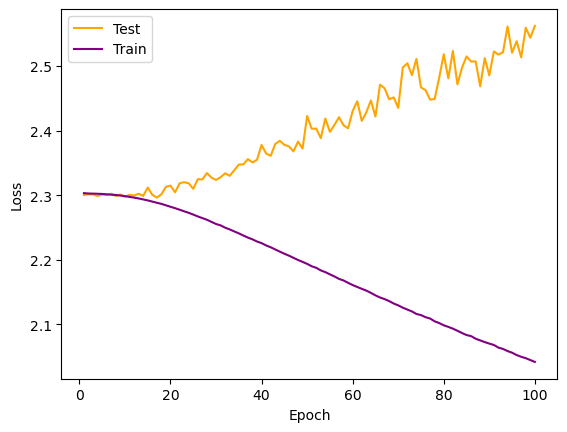

In [16]:
plt.plot(epoch_arr, test_loss_arr, color = "orange")
plt.plot(epoch_arr, train_loss_arr, color = "purple")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Test', 'Train'])
plt.show()

In [17]:
model_param = Model()
param = sum(p.numel() for p in model.parameters())
print(param)

51580
